In [2]:
get_ipython().ast_node_interactivity = 'all'
import pandas 
import numpy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

In [6]:
cd

C:\Users\Mika Montonen


In [7]:
%cd Downloads

C:\Users\Mika Montonen\Downloads


C:\Users\Mika Montonen\miniconda3\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [8]:
%cd MLAi

C:\Users\Mika Montonen\Downloads\MLAi


In [9]:
df = pandas.read_csv("creditCardDefault.csv")

In [12]:
firstNum = ['Limit_Bal','Age','Bill_Amt1','Pay_Amt1']
firstCat = ['Card', 'Marriage', 'Pay_0']

pipeNum = Pipeline( [
    ('selector', ColumnTransformer([ ('selector', 'passthrough', firstNum ) ] )),
    ('scaler', StandardScaler() )
])
pipeCat = Pipeline([
    ('selector', ColumnTransformer([ ('selector', 'passthrough', firstCat ) ] )),
    ('encoder', OneHotEncoder( dtype=int, drop='first', sparse_output=False ) )
])

preprocessor = FeatureUnion([ ('cat', pipeCat ), ('num', pipeNum ) ])

numpy.random.seed(28)
X_train, X_test, y_train, y_test = train_test_split(df, df.Payment, test_size=0.5)



In [13]:
pipeDt = Pipeline([
    ('preprocessor', preprocessor ),
    ('model', DecisionTreeClassifier() )
], verbose=True)

In [14]:
 pipeDt.fit( X_train, y_train )

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.5s


Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('cat',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Card',
                                                                                                    'Marriage',
                                                                                                    'Pay_0'])])),
                                                                 ('encoder',
                                                                  OneHotEncoder(drop='first',
                                                                                dtype=<class 'int'>,
                                                                                sparse_output=False))])),
                                                ('num',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Limit_Bal',
                                                                                                    'Age',
                                                                                                    'Bill_Amt1',
                                                                                                    'Pay_Amt1'])])),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('model', DecisionTreeClassifier())],
         verbose=True)

#### Training Data
Fit, predict, assess 
- Fit the decision tree model on the training data.
- Use the fitted model to predict values in training and in test.
- Assess the fit in training.
- Look at the classification report.
- Check the confusion matrix.

0.997556867026161

              precision    recall  f1-score   support

      Missed       0.99      1.00      1.00      3384
        Paid       1.00      1.00      1.00     11616

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



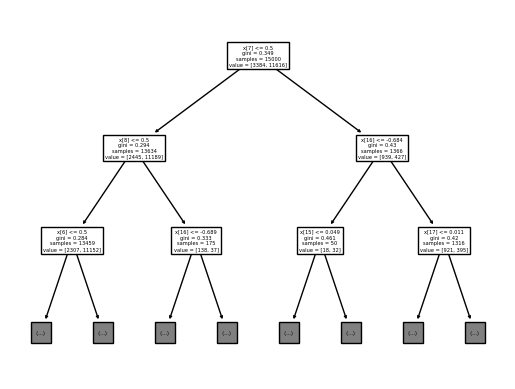

In [18]:
predTrainDt = pipeDt.predict( X_train )
predTestDt = pipeDt.predict( X_test )

sklearn.metrics.balanced_accuracy_score( y_train, predTrainDt )
print( sklearn.metrics.classification_report( y_train, predTrainDt ) )

plotTree = sklearn.tree.plot_tree( pipeDt['model'], max_depth=2)

Trees can be plotted
- Use the `plot_tree` function in `sklearn.tree` to see the decision tree.

In [ ]:
plotTree = plot_tree( pipeDt['model'], max_depth=10)

import matplotlib.pyplot as plt 
plt.figure(figsize=(12,12))
plotTree = plot_tree( pipeDt['model'], max_depth=2, fontsize=15)


tempFeatures = pipeDt[:-1].get_feature_names_out().tolist()
plt.figure(figsize=(20,14))
plotTree = plot_tree( pipeDt['model'], max_depth=2, fontsize=15, feature_names=tempFeatures)


#### Testing data
- Check the fit in the testing data.
- Classification report for test data.
- Confusion matrix for test data.

## Bagged Trees

In [23]:
pipeBagDt = Pipeline([
    ('preprocessor', preprocessor ),
    ('model', BaggingClassifier( DecisionTreeClassifier() ) )
], verbose=True)

Fit and predict.

In [24]:
 pipeBagDt.fit( X_train, y_train )

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   3.7s


Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('cat',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Card',
                                                                                                    'Marriage',
                                                                                                    'Pay_0'])])),
                                                                 ('encoder',
                                                                  OneHotEncoder(drop='first',
                                                                                dtype=<class 'int'>,
                                                                                sparse_output=False))])),
                                                ('num',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Limit_Bal',
                                                                                                    'Age',
                                                                                                    'Bill_Amt1',
                                                                                                    'Pay_Amt1'])])),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('model',
                 BaggingClassifier(estimator=DecisionTreeClassifier()))],
         verbose=True)

In [26]:
 predTrainBagDt = pipeBagDt.predict( X_train )
predTestBagDt = pipeBagDt.predict( X_test )



In [28]:
sklearn.metrics.balanced_accuracy_score( y_train, predTrainDt )
sklearn.metrics.balanced_accuracy_score( y_train, predTrainBagDt )

sklearn.metrics.balanced_accuracy_score( y_test, predTestDt )
# 0.6018565458892587
sklearn.metrics.balanced_accuracy_score( y_test, predTestBagDt )
# 0.6427002727637082



0.997556867026161

0.9789319085438524

0.6017522649690236

0.6416995528484396

## Random Forests

In [32]:
pipeRf = Pipeline([
    ('preprocessor', preprocessor ),
    ('model', RandomForestClassifier() )
], verbose=True )

Fit and predict.

In [33]:
pipeRf.fit( X_train, y_train )
predTrainRf = pipeRf.predict( X_train )
predTestRf = pipeRf.predict( X_test )

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=  10.3s


Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('cat',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Card',
                                                                                                    'Marriage',
                                                                                                    'Pay_0'])])),
                                                                 ('encoder',
                                                                  OneHotEncoder(drop='first',
                                                                                dtype=<class 'int'>,
                                                                                sparse_output=False))])),
                                                ('num',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Limit_Bal',
                                                                                                    'Age',
                                                                                                    'Bill_Amt1',
                                                                                                    'Pay_Amt1'])])),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('model', RandomForestClassifier())],
         verbose=True)

Assess fit.

In [34]:
sklearn.metrics.balanced_accuracy_score( y_train, predTrainDt )
# 0.997556867026161
sklearn.metrics.balanced_accuracy_score( y_train, predTrainBagDt )
# 0.9792145951780864
sklearn.metrics.balanced_accuracy_score( y_train, predTrainRf )

0.997556867026161

0.9789319085438524

0.9959862161264482

In [35]:
sklearn.metrics.balanced_accuracy_score( y_test, predTestDt )
# 0.6018565458892587
sklearn.metrics.balanced_accuracy_score( y_test, predTestBagDt )
# 0.6427002727637082
sklearn.metrics.balanced_accuracy_score( y_test, predTestRf )
# 0.6474992367390477
# BZAN 3307 Session 8: Trees Kim


0.6017522649690236

0.6416995528484396

0.6466426883369957

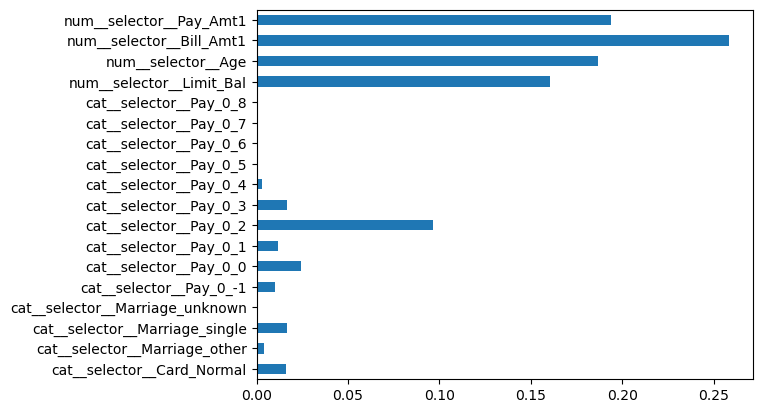

In [36]:
rfBar = pandas.Series( pipeRf[ "model" ].feature_importances_, index=pipeRf[:-1].get_feature_names_out() ).plot.barh()

## Boosted Trees

#### AdaBoost

In [37]:
pipeAda = Pipeline([
    ('preprocessor', preprocessor ),
    ('model', AdaBoostClassifier() )
], verbose=True )

Fit and predict.

In [38]:
pipeAda.fit( X_train, y_train )
predTrainAda = pipeAda.predict( X_train )
predTestAda = pipeAda.predict( X_test )

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   3.9s


Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('cat',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Card',
                                                                                                    'Marriage',
                                                                                                    'Pay_0'])])),
                                                                 ('encoder',
                                                                  OneHotEncoder(drop='first',
                                                                                dtype=<class 'int'>,
                                                                                sparse_output=False))])),
                                                ('num',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Limit_Bal',
                                                                                                    'Age',
                                                                                                    'Bill_Amt1',
                                                                                                    'Pay_Amt1'])])),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('model', AdaBoostClassifier())],
         verbose=True)

Assess fit in training.

In [39]:
sklearn.metrics.balanced_accuracy_score( y_train, predTrainDt )
sklearn.metrics.balanced_accuracy_score( y_train, predTrainBagDt )
sklearn.metrics.balanced_accuracy_score( y_train, predTrainRf )
sklearn.metrics.balanced_accuracy_score( y_train, predTrainAda )

0.997556867026161

0.9789319085438524

0.9959862161264482

0.6484697067385655

Assess fit in testing.

In [40]:
sklearn.metrics.balanced_accuracy_score( y_test, predTestDt )
sklearn.metrics.balanced_accuracy_score( y_test, predTestBagDt )
sklearn.metrics.balanced_accuracy_score( y_test, predTestRf )
sklearn.metrics.balanced_accuracy_score( y_test, predTestAda )

0.6017522649690236

0.6416995528484396

0.6466426883369957

0.6451736465781409

#### Gradient Boost

In [41]:
pipeGbA = Pipeline([
    ('preproccesor', preprocessor),
    ('model', GradientBoostingClassifier())
], verbose=True )

Fit and predict.

In [43]:
 pipeGbA.fit( X_train, y_train )

predTrainGbA = pipeGbA.predict( X_train )
 predTestGbA = pipeGbA.predict( X_test )
# BZAN 3307 Session 8: Trees Kim


[Pipeline] ...... (step 1 of 2) Processing preproccesor, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   8.7s


Pipeline(steps=[('preproccesor',
                 FeatureUnion(transformer_list=[('cat',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Card',
                                                                                                    'Marriage',
                                                                                                    'Pay_0'])])),
                                                                 ('encoder',
                                                                  OneHotEncoder(drop='first',
                                                                                dtype=<class 'int'>,
                                                                                sparse_output=False))])),
                                                ('num',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Limit_Bal',
                                                                                                    'Age',
                                                                                                    'Bill_Amt1',
                                                                                                    'Pay_Amt1'])])),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('model', GradientBoostingClassifier())],
         verbose=True)

Assess fit in training.

In [44]:
sklearn.metrics.balanced_accuracy_score( y_train, predTrainDt )
# 0.997556867026161
sklearn.metrics.balanced_accuracy_score( y_train, predTrainBagDt )
# 0.9792145951780864
sklearn.metrics.balanced_accuracy_score( y_train, predTrainRf )
# 0.9959862161264482
sklearn.metrics.balanced_accuracy_score( y_train, predTrainAda)
# 0.6484697067385655
sklearn.metrics.balanced_accuracy_score( y_train, predTrainGbA )
# 0.6515328575894339

0.997556867026161

0.9789319085438524

0.9959862161264482

0.6484697067385655

0.6515328575894339

Assess fit in testing.

In [45]:
sklearn.metrics.balanced_accuracy_score( y_test, predTestDt )
# 0.6018565458892587
sklearn.metrics.balanced_accuracy_score( y_test, predTestBagDt )
# 0.6427002727637082
sklearn.metrics.balanced_accuracy_score( y_test, predTestRf )
# 0.6474992367390477
sklearn.metrics.balanced_accuracy_score( y_test, predTestAda )
# 0.6451736465781409

0.6017522649690236

0.6416995528484396

0.6466426883369957

0.6451736465781409

## Hyperparameters

Changing the learning rate.

In [46]:
pipeGbB = Pipeline([
    ('preproccesor', preprocessor),
    ('model', GradientBoostingClassifier( learning_rate = 0.6 ))
], verbose=True)


In [47]:
# Fit model
pipeGbB.fit( X_train, y_train )

[Pipeline] ...... (step 1 of 2) Processing preproccesor, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   8.9s


Pipeline(steps=[('preproccesor',
                 FeatureUnion(transformer_list=[('cat',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Card',
                                                                                                    'Marriage',
                                                                                                    'Pay_0'])])),
                                                                 ('encoder',
                                                                  OneHotEncoder(drop='first',
                                                                                dtype=<class 'int'>,
                                                                                sparse_output=False))])),
                                                ('num',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Limit_Bal',
                                                                                                    'Age',
                                                                                                    'Bill_Amt1',
                                                                                                    'Pay_Amt1'])])),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('model', GradientBoostingClassifier(learning_rate=0.6))],
         verbose=True)

In [48]:
# Predict
predTrainGbB = pipeGbB.predict( X_train )
predTestGbB = pipeGbB.predict( X_test )

In [53]:
# A vs B TRAIN
sklearn.metrics.balanced_accuracy_score( y_train, predTrainGbA)
# 0.6515328575894339
sklearn.metrics.balanced_accuracy_score( y_train, predTrainGbB)

# A vs B TEST
sklearn.metrics.balanced_accuracy_score( y_test, predTestGbA)
# 0.6434179893382181
sklearn.metrics.balanced_accuracy_score( y_test, predTestGbB )

0.6515328575894339

0.6946083782701288

0.6431104862631875

0.6401882647529233

#### Grid search space

In [55]:
paramGridGbA = {
    'model__learning_rate': [ 0, 0.15, 0.3, 0.45, 0.6, 0.75 ],
    'model__max_depth': [1, 3, 6, 9]
}

#### Crossfolds

In [56]:
gridGbAAccuracy = GridSearchCV( pipeGbA, paramGridGbA, cv=5, n_jobs=-1, verbose=4)

In [57]:
gridGbAAccuracy.fit( X_train, y_train )
gridGbAAccuracy.best_params_ 
gridGbAAccuracy.best_score_

# Kim: Minimize overfitting

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[Pipeline] ...... (step 1 of 2) Processing preproccesor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   2.9s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproccesor',
                                        FeatureUnion(transformer_list=[('cat',
                                                                        Pipeline(steps=[('selector',
                                                                                         ColumnTransformer(transformers=[('selector',
                                                                                                                          'passthrough',
                                                                                                                          ['Card',
                                                                                                                           'Marriage',
                                                                                                                           'Pay_0'])])),
                                                                                        ('encoder',
                                                                                         OneHotEncoder(drop='first',
                                                                                                       dtype=<class 'int'>,
                                                                                                       sparse_output=False))])),
                                                                       ('num',
                                                                        Pipeline(steps=[('selector',
                                                                                         ColumnTransformer(transformers=[('selector',
                                                                                                                          'passthrough',
                                                                                                                          ['Limit_Bal',
                                                                                                                           'Age',
                                                                                                                           'Bill_Amt1',
                                                                                                                           'Pay_Amt1'])])),
                                                                                        ('scaler',
                                                                                         StandardScaler())]))])),
                                       ('model', GradientBoostingClassifier())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0, 0.15, 0.3, 0.45, 0.6,
                                                  0.75],
                         'model__max_depth': [1, 3, 6, 9]},
             verbose=4)

{'model__learning_rate': 0.3, 'model__max_depth': 1}

0.8164666666666666

In [ ]:
pipeGbA = Pipeline([
	('preprocessor', preprocessor ),
	('model', GradientBoostingClassifier() )
], verbose=True )

sklearn.metrics.balanced_accuracy_score( y_test, predTestDt )
sklearn.metrics.balanced_accuracy_score( y_test, predTestBagDt )
sklearn.metrics.balanced_accuracy_score( y_test, predTestRf )
sklearn.metrics.balanced_accuracy_score( y_test, predTestAda )
sklearn.metrics.balanced_accuracy_score( y_test, predTestGbA )

In [ ]:
gridGbAAccuracy.best_estimator_.predict(X_train)
predTrainGbAT = gridGbAAccuracy.best_estimator_.predict(X_train)
predTestGbAT = gridGbAAccuracy.best_estimator_.predict(X_test)
sklearn.metrics.balanced_accuracy_score( y_test, predTestDt )
sklearn.metrics.balanced_accuracy_score( y_test, predTestBagDt )
sklearn.metrics.balanced_accuracy_score( y_test, predTestRf )
sklearn.metrics.balanced_accuracy_score( y_test, predTestAda )
sklearn.metrics.balanced_accuracy_score( y_test, predTestGbA )
sklearn.metrics.balanced_accuracy_score( y_test, predTestGbAT )

## Practice